In [39]:
import numpy as np
import pandas as pd

In [40]:
%pip install nbformat --upgrade

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: nbformat in c:\users\luiz felix\appdata\local\packages\pythonsoftwarefoundation.python.3.11_qbz5n2kfra8p0\localcache\local-packages\python311\site-packages (5.10.4)




[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\Luiz Felix\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [41]:
df = pd.read_csv("marketing_investimento.csv")

In [42]:
df.head()

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim
1,42,casado (a),medio,nao,1289,nao,250,4,sim
2,23,solteiro (a),superior,nao,363,nao,16,18,nao
3,58,divorciado (a),superior,nao,1382,nao,700,1,sim
4,50,casado (a),medio,nao,3357,nao,239,4,sim


In [43]:
df.isnull().sum()

idade                     0
estado_civil              0
escolaridade              0
inadimplencia             0
saldo                     0
fez_emprestimo            0
tempo_ult_contato         0
numero_contatos           0
aderencia_investimento    0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1268 entries, 0 to 1267
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   idade                   1268 non-null   int64 
 1   estado_civil            1268 non-null   object
 2   escolaridade            1268 non-null   object
 3   inadimplencia           1268 non-null   object
 4   saldo                   1268 non-null   int64 
 5   fez_emprestimo          1268 non-null   object
 6   tempo_ult_contato       1268 non-null   int64 
 7   numero_contatos         1268 non-null   int64 
 8   aderencia_investimento  1268 non-null   object
dtypes: int64(4), object(5)
memory usage: 89.3+ KB


In [45]:
df.columns

Index(['idade', 'estado_civil', 'escolaridade', 'inadimplencia', 'saldo',
       'fez_emprestimo', 'tempo_ult_contato', 'numero_contatos',
       'aderencia_investimento'],
      dtype='object')

In [46]:
import plotly.express as px

In [47]:
px.histogram(df, x = 'aderencia_investimento', text_auto=True)

In [48]:
px.histogram(df, x = 'estado_civil', text_auto=True, color='aderencia_investimento', barmode='group')

In [49]:
px.histogram(df, x = 'escolaridade', text_auto=True, color='aderencia_investimento', barmode='group')

In [50]:
px.histogram(df, x = 'inadimplencia', text_auto=True, color='aderencia_investimento', barmode='group')

In [51]:
px.histogram(df, x = 'fez_emprestimo', text_auto=True, color='aderencia_investimento', barmode='group')

In [52]:
px.box(df, x='idade', color='aderencia_investimento')

In [53]:
px.box(df, x='saldo', color='aderencia_investimento')

In [54]:
px.box(df, x='tempo_ult_contato', color='aderencia_investimento')

In [55]:
px.box(df, x='numero_contatos', color='aderencia_investimento')

In [56]:
#separação dos dados
x = df.drop('aderencia_investimento', axis=1)
y = df['aderencia_investimento']

In [57]:
x

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,casado (a),superior,nao,242,nao,587,1
1,42,casado (a),medio,nao,1289,nao,250,4
2,23,solteiro (a),superior,nao,363,nao,16,18
3,58,divorciado (a),superior,nao,1382,nao,700,1
4,50,casado (a),medio,nao,3357,nao,239,4
...,...,...,...,...,...,...,...,...
1263,52,solteiro (a),superior,nao,83,nao,1223,6
1264,35,solteiro (a),superior,nao,5958,nao,215,1
1265,30,solteiro (a),superior,nao,-477,sim,1532,2
1266,42,casado (a),superior,nao,2187,nao,525,3


In [58]:
y

0       sim
1       sim
2       nao
3       sim
4       sim
       ... 
1263    sim
1264    sim
1265    sim
1266    sim
1267    sim
Name: aderencia_investimento, Length: 1268, dtype: object

In [59]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

In [60]:
colunas = x.columns

In [61]:
one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary'),
    ['estado_civil', 'escolaridade', 'inadimplencia', 'fez_emprestimo']
),
    remainder='passthrough',
    sparse_threshold=0)

In [62]:
x = one_hot.fit_transform(x)

In [63]:
one_hot.get_feature_names_out(colunas)

array(['onehotencoder__estado_civil_casado (a)',
       'onehotencoder__estado_civil_divorciado (a)',
       'onehotencoder__estado_civil_solteiro (a)',
       'onehotencoder__escolaridade_fundamental',
       'onehotencoder__escolaridade_medio',
       'onehotencoder__escolaridade_superior',
       'onehotencoder__inadimplencia_sim',
       'onehotencoder__fez_emprestimo_sim', 'remainder__idade',
       'remainder__saldo', 'remainder__tempo_ult_contato',
       'remainder__numero_contatos'], dtype=object)

In [64]:
pd.DataFrame(x, columns = one_hot.get_feature_names_out(colunas))

,onehotencoder__estado_civil_casado (a),onehotencoder__estado_civil_divorciado (a),onehotencoder__estado_civil_solteiro (a),onehotencoder__escolaridade_fundamental,onehotencoder__escolaridade_medio,onehotencoder__escolaridade_superior,onehotencoder__inadimplencia_sim,onehotencoder__fez_emprestimo_sim,remainder__idade,remainder__saldo,remainder__tempo_ult_contato,remainder__numero_contatos
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,45.0,242.0,587.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,42.0,1289.0,250.0,4.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,23.0,363.0,16.0,18.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,58.0,1382.0,700.0,1.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,50.0,3357.0,239.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1263,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,52.0,83.0,1223.0,6.0
1264,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,35.0,5958.0,215.0,1.0
1265,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,30.0,-477.0,1532.0,2.0
1266,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,42.0,2187.0,525.0,3.0


In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
label_encoder = LabelEncoder()

In [68]:
y = label_encoder.fit_transform(y)

In [69]:
y

array([1, 1, 0, ..., 1, 1, 1])

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, stratify=y, random_state=5)

In [94]:
from sklearn.dummy import DummyClassifier

In [95]:
dummy = DummyClassifier()
dummy.fit(x_treino, y_treino)

dummy.score(x_treino, y_treino)

0.6046267087276551

In [96]:
from sklearn.tree import DecisionTreeClassifier
arvore = DecisionTreeClassifier(random_state=5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(random_state=5)

In [97]:
arvore.predict(x_teste)

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,

In [98]:
arvore.score(x_teste, y_teste)

0.6656151419558359

In [99]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [102]:
nome_colunas = ['casado (a)',
                'divorciado (a)',
                'solteiro (a)',
                'fundamental',
                'medio',
                'superior',
                'inadimplencia',
                'fez_emprestimo',
                'idade',
                'saldo',
                'tempo_ult_contato',
                'numero_contatos']


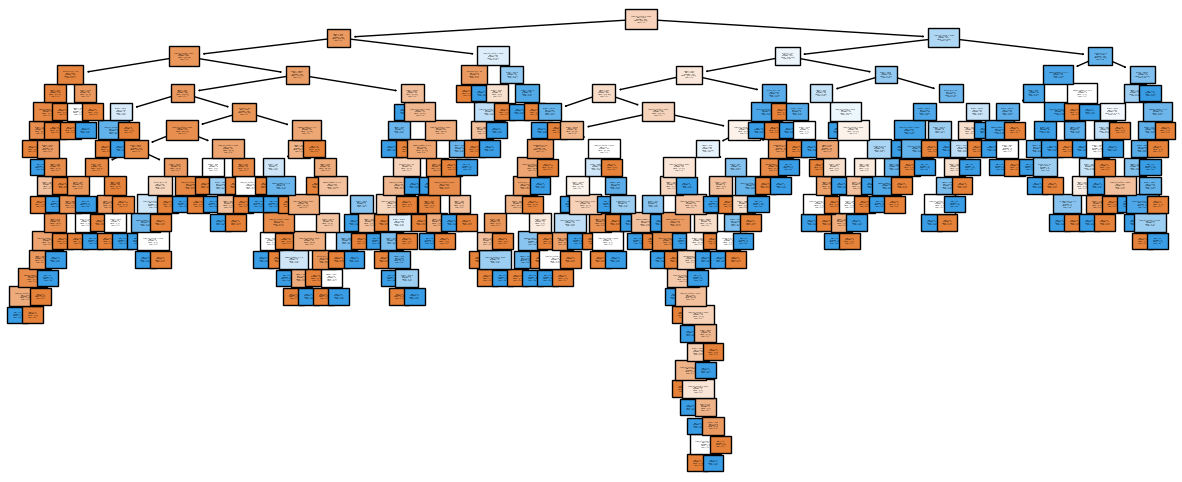

In [103]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled=True, class_names = ['não','sim'], fontsize=1, feature_names=nome_colunas);

In [104]:
arvore.score(x_treino, y_treino)

1.0

In [105]:
arvore = DecisionTreeClassifier(max_depth = 3, random_state = 5)
arvore.fit(x_treino, y_treino)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [106]:
arvore.score(x_treino, y_treino)

0.7613038906414301

In [107]:
arvore.score(x_teste, y_teste)

0.7160883280757098

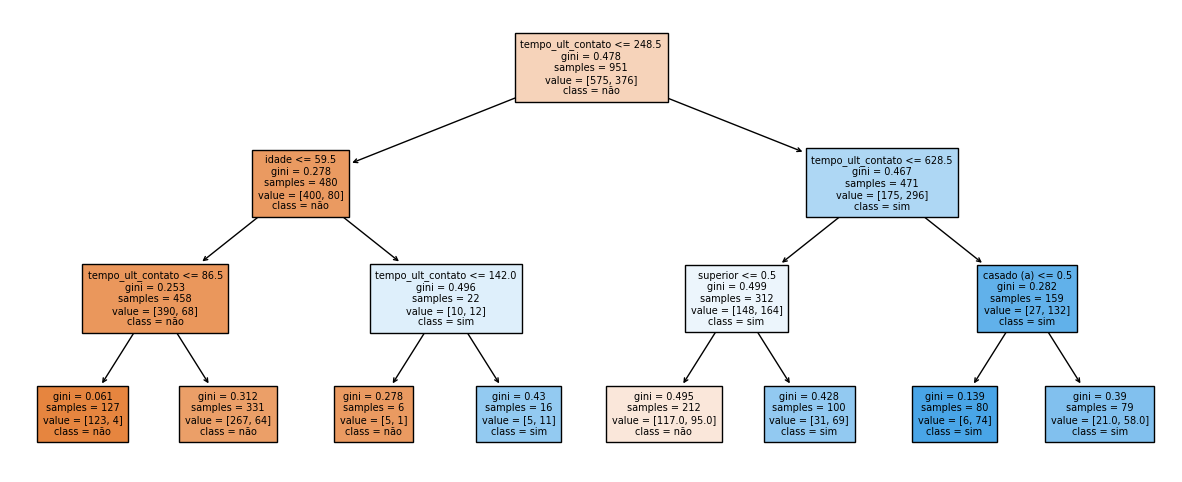

In [108]:
plt.figure(figsize = (15,6))
plot_tree(arvore, filled=True, class_names = ['não','sim'], fontsize=7, feature_names=nome_colunas);

In [109]:
from sklearn.preprocessing import MinMaxScaler

In [110]:
normalizacao = MinMaxScaler()
x_treino_normalizado = normalizacao.fit_transform(x_treino)

In [111]:
pd.DataFrame(x_treino_normalizado)

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.205882,0.065564,0.123734,0.032258
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.147059,0.045792,0.396527,0.032258
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.076036,0.335022,0.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.573529,0.062866,0.315123,0.000000
4,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.338235,0.148380,0.065847,0.129032
...,...,...,...,...,...,...,...,...,...,...,...,...
946,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.191176,0.044265,0.246382,0.129032
947,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.205882,0.028043,0.275687,0.032258
948,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.323529,0.042952,0.024964,0.129032
949,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.176471,0.042810,0.023878,0.000000


In [113]:
from sklearn.neighbors import KNeighborsClassifier

In [115]:
knn = KNeighborsClassifier()

In [116]:
knn.fit(x_treino_normalizado, y_treino)

KNeighborsClassifier()

In [119]:
x_teste_normalizado = normalizacao.transform(x_teste)


In [120]:
knn.score(x_teste_normalizado, y_teste)

0.6876971608832808

In [121]:
print(f'Acurácia Dummy: {dummy.score(x_teste, y_teste)}')
print(f'Acurácia Árvore: {arvore.score(x_teste, y_teste)}')
print(f'Acurácia KNN: {knn.score(x_teste_normalizado, y_teste)}')

Acurácia Dummy: 0.6025236593059937
Acurácia Árvore: 0.7160883280757098
Acurácia KNN: 0.6876971608832808


In [122]:
import pickle

In [123]:
with open('modelo_onehotenc.pkl', 'wb') as arquivo:
    pickle.dump(one_hot, arquivo)

In [124]:
with open('modelo_arvore.pkl', 'wb') as arquivo:
    pickle.dump(arvore, arquivo)

In [126]:
df.head(1)

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,aderencia_investimento
0,45,casado (a),superior,nao,242,nao,587,1,sim


In [127]:
novo_dado = {
    'idade': [45],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

In [128]:
novo_dado = pd.DataFrame(novo_dado)
novo_dado

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos
0,45,solteiro (a),superior,nao,23040,nao,800,4


In [129]:
modelo_one_hot = pd.read_pickle('modelo_onehotenc.pkl')
modelo_arvore = pd.read_pickle('modelo_arvore.pkl')

In [130]:
modelo_arvore.predict(novo_dado)

C:\Users\Luiz Felix\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but DecisionTreeClassifier was fitted without feature names



ValueError: could not convert string to float: 'solteiro (a)'

In [132]:
novo_dado = modelo_one_hot.transform(novo_dado)
modelo_arvore.predict(novo_dado)

array([1])

In [137]:
import pandas as pd

# Seus dados como um dicionário
novo_dado = {
    'idade': [45],
    'estado_civil': ['solteiro (a)'],
    'escolaridade': ['superior'],
    'inadimplencia': ['nao'],
    'saldo': [23040],
    'fez_emprestimo': ['nao'],
    'tempo_ult_contato': [800],
    'numero_contatos': [4]
}

# Convertendo para DataFrame pandas
df_novo = pd.DataFrame(novo_dado)

# Realizar a predição nos novos dados
novo_dado_transformado = modelo_one_hot.transform(df_novo)

predicoes = modelo_arvore.predict(novo_dado_transformado)

# Adicionar as previsões como uma nova coluna ao DataFrame original
df_novo['predicao'] = predicoes

# Exibir o DataFrame com a coluna de predição incluída
# print(df_novo)
df_novo = pd.DataFrame(df_novo)
df_novo

,idade,estado_civil,escolaridade,inadimplencia,saldo,fez_emprestimo,tempo_ult_contato,numero_contatos,predicao
0,45,solteiro (a),superior,nao,23040,nao,800,4,1
